In [1]:
import pandas as pd
import numpy as np

from sklearn.metrics import mean_absolute_error as mae

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!wget https://raw.githubusercontent.com/dataworkshop/5dwchallenge_2019/master/challenge5/input/daily-temp.csv

--2019-10-09 08:17:21--  https://raw.githubusercontent.com/dataworkshop/5dwchallenge_2019/master/challenge5/input/daily-temp.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 67980 (66K) [text/plain]
Saving to: ‘daily-temp.csv.1’

daily-temp.csv.1    100%[===================>]  66.39K  --.-KB/s    in 0.02s   

2019-10-09 08:17:21 (2.61 MB/s) - ‘daily-temp.csv.1’ saved [67980/67980]



In [3]:
!wget https://raw.githubusercontent.com/dataworkshop/5dwchallenge_2019/master/challenge5/input/lynx.csv

--2019-10-09 08:17:22--  https://raw.githubusercontent.com/dataworkshop/5dwchallenge_2019/master/challenge5/input/lynx.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1764 (1.7K) [text/plain]
Saving to: ‘lynx.csv.1’

lynx.csv.1          100%[===================>]   1.72K  --.-KB/s    in 0s      

2019-10-09 08:17:22 (183 MB/s) - ‘lynx.csv.1’ saved [1764/1764]



In [4]:
!wget https://raw.githubusercontent.com/dataworkshop/5dwchallenge_2019/master/challenge5/input/mauna_loa.csv

--2019-10-09 08:17:22--  https://raw.githubusercontent.com/dataworkshop/5dwchallenge_2019/master/challenge5/input/mauna_loa.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 115049 (112K) [text/plain]
Saving to: ‘mauna_loa.csv.1’

mauna_loa.csv.1     100%[===================>] 112.35K  --.-KB/s    in 0.04s   

2019-10-09 08:17:22 (2.95 MB/s) - ‘mauna_loa.csv.1’ saved [115049/115049]



In [5]:
!ls

airmiles.csv	daily-temp.csv.1  day3.ipynb  lynx.csv.1     mauna_loa.csv.1
daily-temp.csv	day2.ipynb	  lynx.csv    mauna_loa.csv


In [6]:
df = pd.read_csv("daily-temp.csv", parse_dates=["Date"], index_col="Date")
df.head()

,"Daily minimum temperatures in Melbourne, Australia, 1981-1990"
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


<Figure size 1080x360 with 0 Axes>

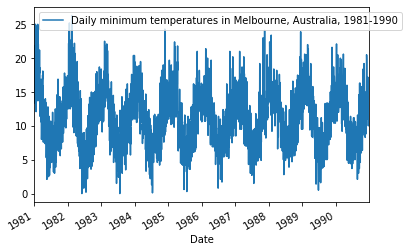

In [7]:
plt.figure(figsize=(15, 5))
df.plot();

In [8]:
df = pd.read_csv("lynx.csv", parse_dates=["time"], index_col="time")
df.head()

,lynx
time,
1821-01-01,269
1822-01-01,321
1823-01-01,585
1824-01-01,871
1825-01-01,1475


<Figure size 1080x360 with 0 Axes>

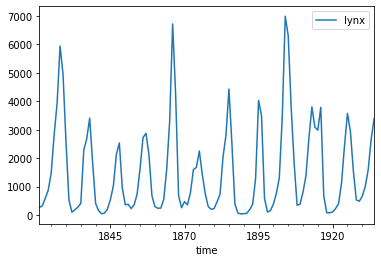

In [9]:
plt.figure(figsize=(15, 5))
df.plot();

In [10]:
df = pd.read_csv("mauna_loa.csv")
df.head()

,year,month,day,decimal,ppm,#days,1 yr ago,10 yr ago,since 1800
0,1974,5,19,1974.3795,333.34,6,-999.99,-999.99,50.36
1,1974,5,26,1974.3986,332.95,6,-999.99,-999.99,50.06
2,1974,6,2,1974.4178,332.32,5,-999.99,-999.99,49.57
3,1974,6,9,1974.4370,332.18,7,-999.99,-999.99,49.63
4,1974,6,16,1974.4562,332.37,7,-999.99,-999.99,50.07


In [11]:
df['date'] = df.apply(lambda row: '{}-{}-{}'.format(int(row['year']), int(row['month']), int(row['day'])), axis=1)
df[['date']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2321 entries, 0 to 2320
Data columns (total 1 columns):
date    2321 non-null object
dtypes: object(1)
memory usage: 18.3+ KB


In [12]:
df['date'] = pd.to_datetime(df['date'])
df[['date']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2321 entries, 0 to 2320
Data columns (total 1 columns):
date    2321 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 18.3 KB


In [13]:
df.index = df['date']

In [14]:
df.head()

,year,month,day,decimal,ppm,#days,1 yr ago,10 yr ago,since 1800,date
date,,,,,,,,,,
1974-05-19,1974,5,19,1974.3795,333.34,6,-999.99,-999.99,50.36,1974-05-19
1974-05-26,1974,5,26,1974.3986,332.95,6,-999.99,-999.99,50.06,1974-05-26
1974-06-02,1974,6,2,1974.4178,332.32,5,-999.99,-999.99,49.57,1974-06-02
1974-06-09,1974,6,9,1974.4370,332.18,7,-999.99,-999.99,49.63,1974-06-09
1974-06-16,1974,6,16,1974.4562,332.37,7,-999.99,-999.99,50.07,1974-06-16


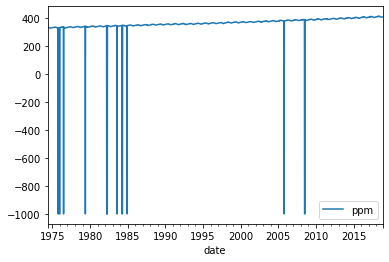

In [15]:
df[['ppm']].plot();

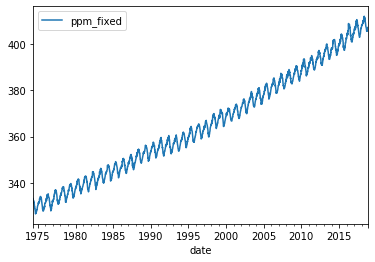

In [16]:
df['ppm_fixed'] = df['ppm'].map(lambda x: np.nan if x < 0 else x).fillna(method='backfill')
df[['ppm_fixed']].plot();

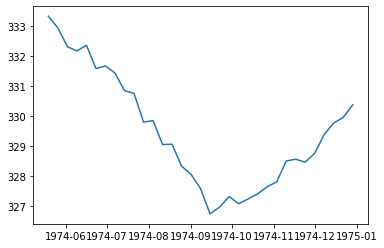

In [17]:
df1974 = df[df.year == 1974]

plt.plot(df1974.index, df1974.ppm_fixed);

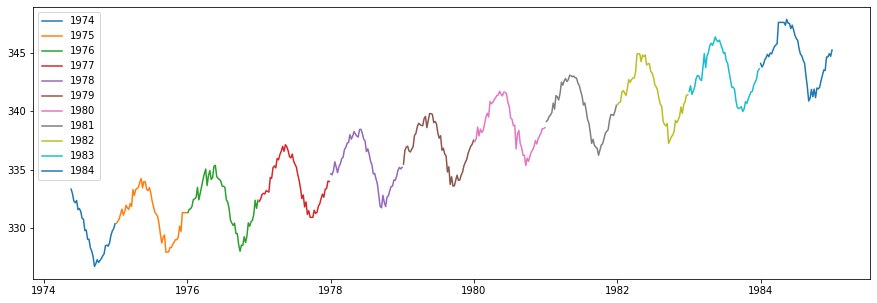

In [18]:
plt.figure(figsize=(15, 5))
for year in range(1974, 1985):
    df_year = df[df.year == year]
    plt.plot(df_year.index, df_year.ppm_fixed, label=year);
plt.legend();

In [19]:
def linear_func(data, k=None, b=0):
    mean_value = np.mean(data)
    if k is None:
        return [mean_value] * len(data)
    
    return [idx*k + b for idx,_ in enumerate(data)]

In [20]:
df_all_years = df[(df.year >= 1974) & (df.year <= 1985)]

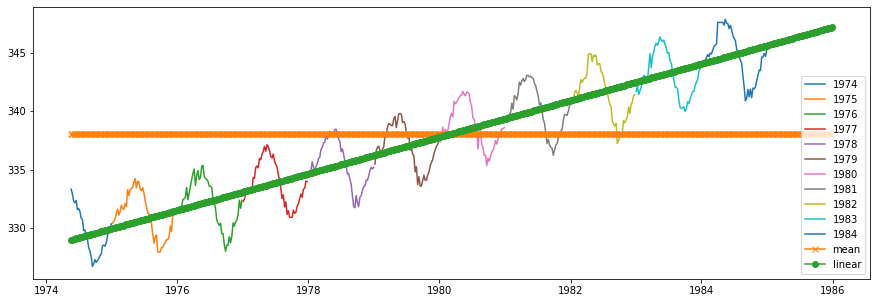

In [21]:
plt.figure(figsize=(15, 5))
for year in range(1974, 1985):
    df_year = df[df.year == year]
    plt.plot(df_year.index, df_year.ppm_fixed, label=year);
plt.plot(df_all_years.index, linear_func(df_all_years.ppm_fixed), 'x-', label='mean');
plt.plot(df_all_years.index, linear_func(df_all_years.ppm_fixed, 0.03, 329), 'o-', label='linear');
plt.legend();

## Metryka sukcesu

In [22]:
print('mean', mae(df_all_years.ppm_fixed, linear_func(df_all_years.ppm_fixed)))
print('linear', mae(df_all_years.ppm_fixed, linear_func(df_all_years.ppm_fixed, 0.03, 329)))

mean 4.6623136987751375
linear 1.8929654036243826


In [23]:
best_k = None
best_b = 0
best_mae = mae(df_all_years.ppm_fixed, linear_func(df_all_years.ppm_fixed, best_k, best_b))

for k in np.linspace(0.001, 0.100, 100):
    for b in range(100, 400):
        actual = mae(df_all_years.ppm_fixed, linear_func(df_all_years.ppm_fixed, k, b))
        if actual < best_mae:
            best_mae = actual
            best_k = k
            best_b = b
            
print("Best mea={} for k={} and b={}".format(best_mae, best_k, best_b))

Best mea=1.8929654036243826 for k=0.030000000000000002 and b=329
